#**Tugas Praktikum-14 Natural Language Processing (NLP)**

#**Nama : Gavrilla Claudia**

#**NIM : 21110004**

## Import Library Needed

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

## Load Data

In [3]:
with open('/content/rihanna.txt', 'r', encoding='unicode_escape') as myfile:
    mytext = myfile.read()

In [4]:
mytext

'Ghost in the mirror\nI knew your face once, but now it\'s unclear\nAnd I can\'t feel my body now\nI\'m separate from here and now A drug and a dream\nWe lost connection, oh come back to me\nSo I can feel alive again\nSoul and body try to mend It\'s pulling me apart, this time\nEverything is never ending\nSlipped into a peril that\nI\'ll never understand\nThis feeling always gets away\nWishing I could hold on longer\nIt doesn\'t have to feel so strange\nTo be in love again, to be in love again, to be in love again Ghost in the mirror\nI knew your face once, but now it\'s unclear\nAnd I can\'t feel my body now\nI\'m separate from here and now It\'s pulling me apart, this time\nEverything is never ending\nSlipped into a peril that\nI\'ll never understand\nThis feeling always gets away\nWishing I could hold on longer\nIt doesn\'t have to feel so strange\nTo be in love again, to be in love again, to be in love again Be in love again [Intro: Rihanna]\nBaby baby baby baby baby yeah\nUsed to 

## Preprocessing

In [5]:
my_tokenizer = Tokenizer()
my_tokenizer.fit_on_texts([mytext])
total_words = len(my_tokenizer.word_index) + 1

In [6]:
my_tokenizer.word_index

{'you': 1,
 'i': 2,
 'the': 3,
 'me': 4,
 'to': 5,
 'it': 6,
 'and': 7,
 'a': 8,
 'my': 9,
 'love': 10,
 'in': 11,
 "i'm": 12,
 'like': 13,
 'yeah': 14,
 'on': 15,
 'that': 16,
 "don't": 17,
 'your': 18,
 'so': 19,
 'be': 20,
 'just': 21,
 'oh': 22,
 'all': 23,
 'but': 24,
 'know': 25,
 'is': 26,
 'up': 27,
 'come': 28,
 'for': 29,
 'got': 30,
 'baby': 31,
 'now': 32,
 'this': 33,
 'no': 34,
 'what': 35,
 'we': 36,
 'take': 37,
 'of': 38,
 "it's": 39,
 'wanna': 40,
 'boy': 41,
 'go': 42,
 'bum': 43,
 'way': 44,
 'do': 45,
 "you're": 46,
 'with': 47,
 'out': 48,
 'get': 49,
 'can': 50,
 'one': 51,
 'feel': 52,
 'music': 53,
 'see': 54,
 'let': 55,
 'how': 56,
 "can't": 57,
 'na': 58,
 'if': 59,
 'make': 60,
 'when': 61,
 'at': 62,
 'work': 63,
 "'cause": 64,
 'life': 65,
 'want': 66,
 'stop': 67,
 'have': 68,
 'where': 69,
 'hard': 70,
 'never': 71,
 'why': 72,
 'night': 73,
 'girl': 74,
 'not': 75,
 'please': 76,
 'only': 77,
 'used': 78,
 'la': 79,
 "that's": 80,
 "ain't": 81,
 'need'

#**Interpretasi Ouput :**

**Dari output tersebut, dapat dilihat bahwa kata-kata dalam teks diubah menjadi angka-angka yang sesuai untuk diproses oleh komputer. Setiap kata memiliki nomor indeks yang unik. Misalnya, kata 'you' berindeks 1,
kata 'i'berindeks 2, kata 'the' berindeks 3, kata 'me' berindeks 4,kata 'to' berindeks 5, dan seterusnya.**


In [7]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

[584, 11, 3, 345]
[2, 369, 18, 179, 238, 24, 32, 39, 661]
[7, 2, 57, 52, 9, 316, 32]
[12, 662, 118, 85, 7, 32, 8, 809, 7, 8, 300]
[36, 221, 974, 22, 28, 88, 5, 4]
[19, 2, 50, 52, 247, 259]
[447, 7, 316, 346, 5, 810, 39, 585, 4, 260, 33, 96]
[222, 26, 71, 663]
[664, 123, 8, 665, 16]
[148, 71, 301]
[33, 153, 133, 586, 83]
[317, 2, 154, 143, 15, 448]
[6, 587, 68, 5, 52, 19, 666]
[5, 20, 11, 10, 259, 5, 20, 11, 10, 259, 5, 20, 11, 10, 259, 584, 11, 3, 345]
[2, 369, 18, 179, 238, 24, 32, 39, 661]
[7, 2, 57, 52, 9, 316, 32]
[12, 662, 118, 85, 7, 32, 39, 585, 4, 260, 33, 96]
[222, 26, 71, 663]
[664, 123, 8, 665, 16]
[148, 71, 301]
[33, 153, 133, 586, 83]
[317, 2, 154, 143, 15, 448]
[6, 587, 68, 5, 52, 19, 666]
[5, 20, 11, 10, 259, 5, 20, 11, 10, 259, 5, 20, 11, 10, 259, 20, 11, 10, 259, 975, 155]
[31, 31, 31, 31, 31, 14]
[78, 5, 10, 1, 78, 5, 10, 1]
[78, 5, 10, 1, 78, 5, 10, 1]
[78, 5, 10, 1, 78, 5, 10, 1]
[78, 5, 10, 1, 78, 5, 10, 1, 370, 513, 155]
[213, 73, 213, 273]
[22, 2, 20, 214, 667, 3

#**Interpretasi Ouput :**

**Dari output tersebut, dapat dilihat bahwa urutan kata - kata (sequence) dimulai dari [584, 11, 3, 345] karena pada dataframe tersebut kata - kata yang muncul di awal adalah "Ghost in the mirror" yang mana kata "ghost" memiliki indeks 584, kata "in" memiliki indeks 11, kata "the" memiliki indeks 3, dan kata "mirror" memilik indeks 345.**

In [8]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

Streaming output truncated to the last 5000 lines.
[12, 19, 70, 19, 70, 138]
[12, 19, 70, 19, 70, 138, 14]
[12, 19, 70, 19, 70, 138, 14, 14]
[12, 19, 70, 19, 70, 138, 14, 14, 14]
[12, 19]
[12, 19, 70]
[12, 19, 70, 87]
[12, 19, 70, 87, 70]
[12, 19, 70, 87, 70, 16]
[12, 19, 70, 87, 70, 16, 2]
[12, 19, 70, 87, 70, 16, 2, 2]
[12, 19, 70, 87, 70, 16, 2, 2, 2]
[12, 19]
[12, 19, 70]
[12, 19, 70, 19]
[12, 19, 70, 19, 70]
[12, 19, 70, 19, 70, 138]
[12, 19, 70, 19, 70, 138, 14]
[12, 19, 70, 19, 70, 138, 14, 14]
[12, 19, 70, 19, 70, 138, 14, 14, 14]
[12, 19]
[12, 19, 70]
[12, 19, 70, 87]
[12, 19, 70, 87, 70]
[19, 70]
[19, 70, 19]
[19, 70, 19, 70]
[19, 70, 19, 70, 19]
[19, 70, 19, 70, 19, 70]
[19, 70, 19, 70, 19, 70, 19]
[19, 70, 19, 70, 19, 70, 19, 70]
[19, 70, 19, 70, 19, 70, 19, 70, 42]
[19, 70, 19, 70, 19, 70, 19, 70, 42, 70]
[19, 70, 19, 70, 19, 70, 19, 70, 42, 70, 558]
[19, 70, 19, 70, 19, 70, 19, 70, 42, 70, 558, 42]
[19, 70, 19, 70, 19, 70, 19, 70, 42, 70, 558, 42, 245]
[88, 5]
[88, 5, 18]

In [9]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [10]:
input_sequences

array([[  0,   0,   0, ...,   0, 584,  11],
       [  0,   0,   0, ..., 584,  11,   3],
       [  0,   0,   0, ...,  11,   3, 345],
       ...,
       [  0,   0,   0, ...,  36, 104,   3],
       [  0,   0,   0, ..., 104,   3, 183],
       [  0,   0,   0, ...,   3, 183, 299]], dtype=int32)

In [11]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [12]:
X[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 584,  11,   3], dtype=int32)

In [13]:
y[2]

345

In [14]:
X

array([[  0,   0,   0, ...,   0,   0, 584],
       [  0,   0,   0, ...,   0, 584,  11],
       [  0,   0,   0, ..., 584,  11,   3],
       ...,
       [  0,   0,   0, ...,   0,  36, 104],
       [  0,   0,   0, ...,  36, 104,   3],
       [  0,   0,   0, ..., 104,   3, 183]], dtype=int32)

In [15]:
y

array([ 11,   3, 345, ...,   3, 183, 299], dtype=int32)

In [16]:
# lakukan one hot encoding
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Define Models

In [20]:
model = tf.keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 37, 100)           201800    
                                                                 
 lstm_1 (LSTM)               (None, 150)               150600    
                                                                 
 dense_1 (Dense)             (None, 2018)              304718    
                                                                 
Total params: 657118 (2.51 MB)
Trainable params: 657118 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
hist = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
822/822 [==============================] - 5s 6ms/step - loss: 0.4662 - accuracy: 0.8567
Epoch 2/100
822/822 [==============================] - 6s 7ms/step - loss: 0.4622 - accuracy: 0.8555
Epoch 3/100
822/822 [==============================] - 5s 6ms/step - loss: 0.4613 - accuracy: 0.8562
Epoch 4/100
822/822 [==============================] - 5s 7ms/step - loss: 0.4589 - accuracy: 0.8538
Epoch 5/100
822/822 [==============================] - 5s 6ms/step - loss: 0.4573 - accuracy: 0.8554
Epoch 6/100
822/822 [==============================] - 5s 6ms/step - loss: 0.4546 - accuracy: 0.8554
Epoch 7/100
822/822 [==============================] - 6s 7ms/step - loss: 0.4549 - accuracy: 0.8545
Epoch 8/100
822/822 [==============================] - 5s 6ms/step - loss: 0.4544 - accuracy: 0.8549
Epoch 9/100
822/822 [==============================] - 5s 6ms/step - loss: 0.4504 - accuracy: 0.8568
Epoch 10/100
822/822 [==============================] - 5s 7ms/step - loss: 0.4484 - accura

**Interpretasi Ouput :**

**Dari output tersebut, dapat dilihat bahwa nilai loss: 0.4173 artinya model memiliki tingkat kehilangan yang relatif rendah. Dengan kata lain, model yang dibuat telah melakukan prediksi yang lebih baik atau lebih dekat dengan nilai target pada data training. Sementara nilai accuracy: 0.8589. Artinya, model yang dibuat memiliki tingkat keakuratan sekitar 85.89% dalam memprediksi target pada data training. Dengan kata lain, sekitar 85.89% dari prediksi yang dilakukan oleh model adalah benar berdasarkan data training.**

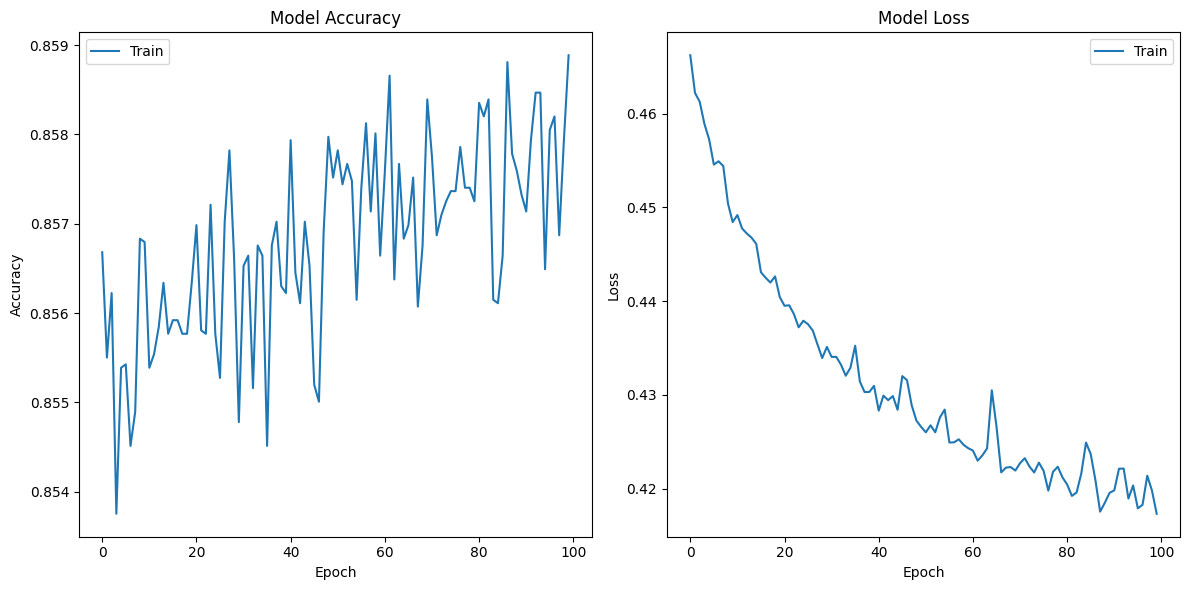

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Interpretasi Ouput :**

**Dari output tersebut, dapat dilihat bahwa akurasi model memiliki tingkat keakuratan sekitar 85.89% dalam memprediksi target pada data training. Dengan kata lain, sekitar 85.89% dari prediksi yang dilakukan oleh model adalah benar berdasarkan data training. Sementara untuk model loss memiliki nilai sebesar 0.4173 atau 41.73% artinya model memiliki tingkat kehilangan yang relatif rendah. Dengan kata lain, model yang dibuat telah melakukan prediksi yang lebih baik atau lebih dekat dengan nilai target pada data training.**

In [27]:
model.save("mymodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Make Prediction

In [28]:
model_loaded = load_model("mymodel.h5")

In [30]:
import numpy as np

input_text = "Rihanna"
predict_next_words = 5

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predictions = model_loaded.predict(token_list)[0]

    # Get indices of top predicted words
    top_indices = np.argsort(predictions)[-5:][::-1]  # Adjust 5 to the number of top words you want

    # Get words corresponding to the indices
    next_words = [word for word, index in my_tokenizer.word_index.items() if index in top_indices]

    # Print the list of next words along with their probabilities
    print("Input Text:", input_text)
    print("Next Words and Probabilities:")
    for word, index in zip(next_words, top_indices):
        probability = predictions[index]
        print(f"{word}: {probability:.4f}")

    # Choose the word with the highest probability as the next word
    output_word = my_tokenizer.index_word[top_indices[0]]

    input_text += " " + output_word

print(input_text)

1/1 [==============================] - 0s 18ms/step
Input Text: Rihanna
Next Words and Probabilities:
you: 0.9878
just: 0.0032
where: 0.0022
girl: 0.0015
good: 0.0009
1/1 [==============================] - 0s 17ms/step
Input Text: Rihanna where
Next Words and Probabilities:
you: 0.9971
i: 0.0014
more: 0.0006
they: 0.0003
touch: 0.0002
1/1 [==============================] - 0s 18ms/step
Input Text: Rihanna where you
Next Words and Probabilities:
come: 0.9946
at: 0.0032
please: 0.0003
ya: 0.0003
touch: 0.0002
1/1 [==============================] - 0s 20ms/step
Input Text: Rihanna where you at
Next Words and Probabilities:
you: 0.9800
i: 0.0082
yeah: 0.0018
with: 0.0016
where: 0.0014
1/1 [==============================] - 0s 19ms/step
Input Text: Rihanna where you at you
Next Words and Probabilities:
you: 0.9963
don't: 0.0014
let: 0.0007
can't: 0.0002
had: 0.0002
Rihanna where you at you had


**Interpretasi Ouput :**

**Dari output tersebut, dapat dilihat bahwa teks yang dimasukkan adalah kata "Rihanna". Kemudian model yang digunakan memprediksi kata-kata berikutnya dalam sebuah teks setelah kata "Rihanna" adalah kata "you" dengan probabilitas sebesar 0.9878.**

In [31]:
input_text = "Don't stop the music"
predict_next_words = 10

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[17, 67, 3, 53]
1/1 [==============================] - 0s 26ms/step
[17, 67, 3, 53, 53]
1/1 [==============================] - 0s 26ms/step
[17, 67, 3, 53, 53, 53]
1/1 [==============================] - 0s 27ms/step
[17, 67, 3, 53, 53, 53, 39]
1/1 [==============================] - 0s 28ms/step
[17, 67, 3, 53, 53, 53, 39, 252]
1/1 [==============================] - 0s 26ms/step
[17, 67, 3, 53, 53, 53, 39, 252, 193]
1/1 [==============================] - 0s 26ms/step
[17, 67, 3, 53, 53, 53, 39, 252, 193, 12]
1/1 [==============================] - 0s 29ms/step
[17, 67, 3, 53, 53, 53, 39, 252, 193, 12, 473]
1/1 [==============================] - 0s 27ms/step
[17, 67, 3, 53, 53, 53, 39, 252, 193, 12, 473, 9]
1/1 [==============================] - 0s 40ms/step
[17, 67, 3, 53, 53, 53, 39, 252, 193, 12, 473, 9, 44]
1/1 [==============================] - 0s 26ms/step
Don't stop the music music music it's getting late i'm making my way over


## Save Model

In [32]:
model.save("mymodel.h5")

## Load Model

In [33]:
model_loaded = load_model("mymodel.h5")

In [35]:
input_text = "Umbrella"
predict_next_words = 15

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[307]
1/1 [==============================] - 0s 26ms/step
[307, 91]
1/1 [==============================] - 0s 25ms/step
[307, 91, 216]
1/1 [==============================] - 0s 26ms/step
[307, 91, 216, 412]
1/1 [==============================] - 0s 29ms/step
[307, 91, 216, 412, 169]
1/1 [==============================] - 0s 35ms/step
[307, 91, 216, 412, 169, 33]
1/1 [==============================] - 0s 25ms/step
[307, 91, 216, 412, 169, 33, 26]
1/1 [==============================] - 0s 25ms/step
[307, 91, 216, 412, 169, 33, 26, 297]
1/1 [==============================] - 0s 28ms/step
[307, 91, 216, 412, 169, 33, 26, 297, 12]
1/1 [==============================] - 0s 27ms/step
[307, 91, 216, 412, 169, 33, 26, 297, 12, 75]
1/1 [==============================] - 0s 26ms/step
[307, 91, 216, 412, 169, 33, 26, 297, 12, 75, 297]
1/1 [==============================] - 0s 28ms/step
[307, 91, 216, 412, 169, 33, 26, 297, 12, 75, 297, 11]
1/1 [==============================] - 0s 33ms/step
[307, 